     Pokemon   Pokebola  Tasa exito  Media de captura
0    jolteon   pokeball        0.04            0.0586
1    jolteon  ultraball        0.07            0.1172
2    jolteon   fastball        0.25            0.2344
3    jolteon  heavyball        0.02            0.0326
4   caterpie   pokeball        0.40            0.3320
5   caterpie  ultraball        0.65            0.6641
6   caterpie   fastball        0.29            0.3320
7   caterpie  heavyball        0.32            0.3060
8    snorlax   pokeball        0.05            0.0326
9    snorlax  ultraball        0.09            0.0651
10   snorlax   fastball        0.01            0.0326
11   snorlax  heavyball        0.07            0.0846
12      onix   pokeball        0.03            0.0586
13      onix  ultraball        0.11            0.1172
14      onix   fastball        0.04            0.0586
15      onix  heavyball        0.08            0.0846
16    mewtwo   pokeball        0.01            0.0039
17    mewtwo  ultraball     

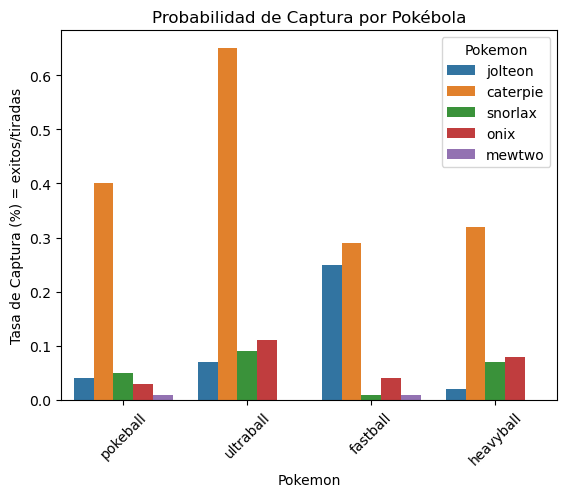

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 16 19:38:18 2025

@author: Arian
"""
import sys
sys.path.append('C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0')

import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# carga de pókemon

pokemon_file = "C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0\\pokemon.json"

with open(pokemon_file,"r") as f:
    datos_pokemon = json.load(f)
     
# Pokebolas y pokemones

pokemon = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokebolas = ["pokeball", "ultraball", "fastball", "heavyball"]

# Generacion

gen_pokemon = PokemonFactory(pokemon_file)



# La idea es generar una función que utilice attemp catch pero para varios pokemones

def atrapar(pokemon,pokebola,intentos):
    resultados = []
    resultados_por_tirada = []
    NIVEL = 100
    HP = 1
    for bolas in pokebolas:
        exitos = 0
        probabilidad_exito = []
        
        for _ in range(intentos):
            pokes = gen_pokemon.create(pokemon, NIVEL, StatusEffect.NONE, HP)
            exitos_tasa, capture = attempt_catch(pokes, bolas)
            
            if exitos_tasa:
                exitos += 1
            probabilidad_exito.append(capture)   
            # resultados.append([pokemon,bolas,exitos/intentos,np.mean(probabilidad_exito)])
        
        resultados.append([pokemon,bolas,exitos/intentos,np.mean(probabilidad_exito)])
        
    
    return resultados
        
# Usamos esta función para cada uno de los pokemones 
            
INTENTOS = 100;
resultados = []
for pkmn in pokemon:
    resultados.extend((atrapar(pkmn, pokebolas,INTENTOS)))
    
# Ahora lo que quiero es reunir las estadisticas de cada bola por pojemon


    
# Crear un DataFrame con los resultados
df_results = pd.DataFrame(resultados, columns=["Pokemon", "Pokebola", "Tasa exito", "Media de captura"])

print(df_results)

# df_results = df_results[df_results["Pokemon"] == "caterpie"] # Selecciono solo los datos del pokemon que quiero 
df_sea = df_results.pivot(index = "Pokemon", columns = "Pokebola", values = "Tasa exito") # reordeno
sns.barplot(data=df_results, x="Pokebola", y="Tasa exito", hue="Pokemon")
#sns.barplot(df_results)

 # Etiquetas y título
plt.xlabel("Pokemon")
plt.ylabel("Tasa de Captura (%) = exitos/tiradas")
plt.title("Probabilidad de Captura por Pokébola")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



     Pokemon     estado   Pokebola  Tasa exito  Media de captura
0    jolteon   pokeball       NONE        0.04            0.0586
1    jolteon  ultraball       NONE        0.12            0.1172
2    jolteon   fastball       NONE        0.21            0.2344
3    jolteon  heavyball       NONE        0.04            0.0326
4    jolteon   pokeball      SLEEP        0.14            0.1172
..       ...        ...        ...         ...               ...
115   mewtwo  heavyball       BURN        0.00            0.0020
116   mewtwo   pokeball  PARALYSIS        0.00            0.0059
117   mewtwo  ultraball  PARALYSIS        0.01            0.0117
118   mewtwo   fastball  PARALYSIS        0.03            0.0234
119   mewtwo  heavyball  PARALYSIS        0.00            0.0020

[120 rows x 5 columns]


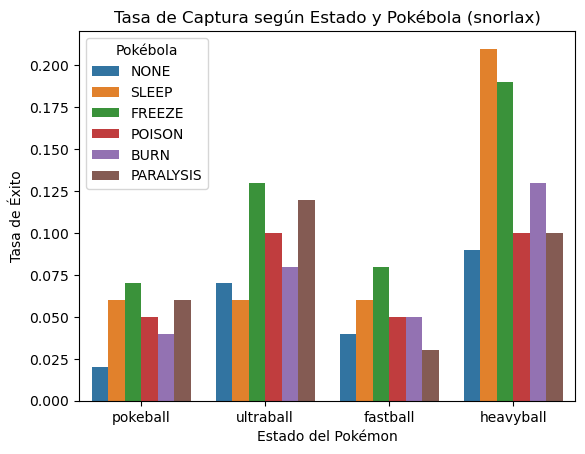

In [24]:
import sys
sys.path.append('C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0')

import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# carga de pókemon

pokemon_file = "C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0\\pokemon.json"

with open(pokemon_file,"r") as f:
    datos_pokemon = json.load(f)
     
# Pokebolas y pokemones

pokemon = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokebolas = ["pokeball", "ultraball", "fastball", "heavyball"]
estado_pokemon = ["NONE", "SLEEP", "FREEZE", "POISON", "BURN", "PARALYSIS"]
# Generacion

gen_pokemon = PokemonFactory(pokemon_file)

# La idea es generar una función que utilice attemp catch pero para varios pokemones

def atrapar(pokemon,pokebola,estado_pokemon,intentos):
    resultados = []
    resultados_promediados = []
    NIVEL = 100
    HP = 1
    
    for estado in estado_pokemon:
        for bolas in pokebolas:
            exitos = 0
            probabilidad_exito = []
            
            for _ in range(intentos):
                pokes = gen_pokemon.create(pokemon, NIVEL, StatusEffect[estado], HP)
                exitos_tasa, capture = attempt_catch(pokes, bolas)

                if exitos_tasa:
                    exitos += 1
                probabilidad_exito.append(capture)   
                
            resultados.append([pokemon,bolas,estado,exitos/intentos,np.mean(probabilidad_exito)])    
   
    return resultados
        
INTENTOS = 100;
resultados = []
for pkmn in pokemon:
    resultados.extend((atrapar(pkmn, pokebolas,estado_pokemon,INTENTOS)))

df_results = pd.DataFrame(resultados, columns=["Pokemon","estado", "Pokebola", "Tasa exito", "Media de captura"])

print(df_results)

pokemon_seleccionado = "snorlax"
df_filtrado = df_results[df_results["Pokemon"] == pokemon_seleccionado] # Selecciono solo los datos del pokemon que quiero 
sns.barplot(data=df_filtrado, x="estado", y="Tasa exito", hue="Pokebola")



plt.xlabel("Estado del Pokémon")
plt.ylabel("Tasa de Éxito")
plt.title(f"Tasa de Captura según Estado y Pokébola ({pokemon_seleccionado})")
plt.legend(title="Pokébola")
plt.show()




      Pokemon   HP   Pokebola  Tasa exito  Media de captura
0    caterpie   10   pokeball        0.94            0.9297
1    caterpie   10  ultraball        1.00            1.0000
2    caterpie   10   fastball        0.92            0.9297
3    caterpie   10  heavyball        0.90            0.8568
4    caterpie   20   pokeball        0.89            0.8633
..        ...  ...        ...         ...               ...
115   jolteon   90  heavyball        0.02            0.0396
116   jolteon  100   pokeball        0.12            0.0586
117   jolteon  100  ultraball        0.08            0.1172
118   jolteon  100   fastball        0.27            0.2344
119   jolteon  100  heavyball        0.04            0.0326

[120 rows x 5 columns]


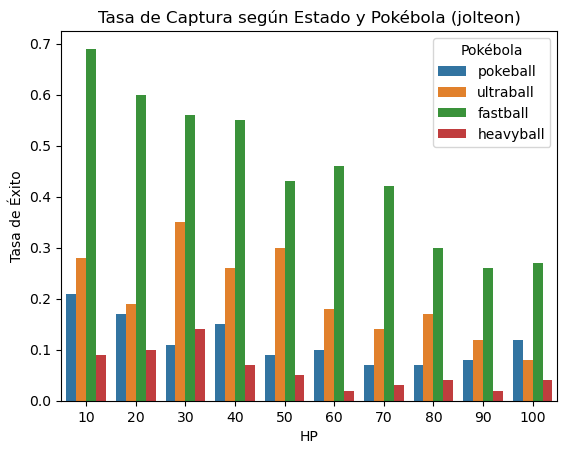

In [26]:
import sys
sys.path.append('C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0')

import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# carga de pókemon

pokemon_file = "C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0\\pokemon.json"
with open(pokemon_file,"r") as f:
    datos_pokemon = json.load(f)
     
# Pokebolas y pokemones

pokemon = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokebolas = ["pokeball", "ultraball", "fastball", "heavyball"]
HP = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Generacion

gen_pokemon = PokemonFactory(pokemon_file)



# La idea es generar una función que utilice attemp catch pero para varios pokemones

def atrapar(pokemon,pokebola,intentos,HP):
    resultados = []
    resultados_promediados = []
    NIVEL = 100
    
    
    for HPP in HP:
        for bolas in pokebolas:
            exitos = 0
            probabilidad_exito = []
            
            for _ in range(intentos):
                pokes = gen_pokemon.create(pokemon, NIVEL, StatusEffect.NONE, HPP/100)
                exitos_tasa, capture = attempt_catch(pokes, bolas)

                if exitos_tasa:
                    exitos += 1
                probabilidad_exito.append(capture)   
                
            resultados.append([pokemon,HPP,bolas,exitos/intentos,np.mean(probabilidad_exito)])    
   
    return resultados
        
INTENTOS = 100;
pokemon_comparacion = ["caterpie","snorlax",'jolteon']
resultados = []
for pkmn in pokemon_comparacion:
    resultados.extend((atrapar(pkmn, pokebolas,INTENTOS,HP)))
    
df_results = pd.DataFrame(resultados, columns=["Pokemon","HP", "Pokebola", "Tasa exito", "Media de captura"])

print(df_results)

pokemon_seleccionado = "jolteon"
df_filtrado = df_results[df_results["Pokemon"] == pokemon_seleccionado] # Selecciono solo los datos del pokemon que quiero 
sns.barplot(data=df_filtrado, x="HP", y="Tasa exito", hue="Pokebola")



plt.xlabel("HP")
plt.ylabel("Tasa de Éxito")
plt.title(f"Tasa de Captura según Estado y Pokébola ({pokemon_seleccionado})")
plt.legend(title="Pokébola")
plt.show()

     Pokemon  NIVEL   Pokebola  Tasa exito  Media de captura
0    jolteon     10   pokeball        0.04            0.0587
1    jolteon     10  ultraball        0.10            0.1172
2    jolteon     10   fastball        0.23            0.2344
3    jolteon     10  heavyball        0.05            0.0326
4    jolteon     20   pokeball        0.08            0.0586
..       ...    ...        ...         ...               ...
195   mewtwo     90  heavyball        0.01            0.0013
196   mewtwo    100   pokeball        0.00            0.0039
197   mewtwo    100  ultraball        0.01            0.0078
198   mewtwo    100   fastball        0.05            0.0156
199   mewtwo    100  heavyball        0.00            0.0013

[200 rows x 5 columns]


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2132\1460390331.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_results, x="NIVEL", y="Tasa exito", hue="Pokemon", marker="o",ci="sd")


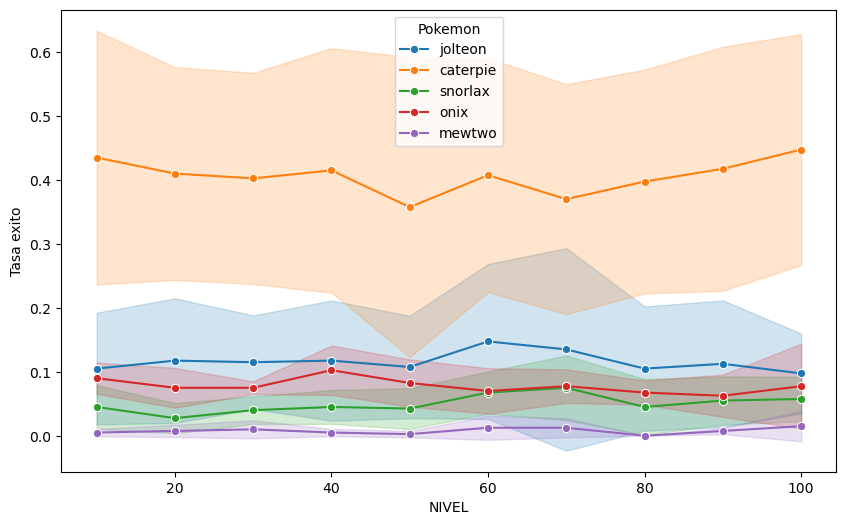

In [28]:
import sys
sys.path.append('C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0')

import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# carga de pókemon

pokemon_file = "C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0\\pokemon.json"
with open(pokemon_file,"r") as f:
    datos_pokemon = json.load(f)
     
# Pokebolas y pokemones

pokemon = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokebolas = ["pokeball", "ultraball", "fastball", "heavyball"]
NIVEL = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Generacion

gen_pokemon = PokemonFactory(pokemon_file)



# La idea es generar una función que utilice attemp catch pero para varios pokemones

def atrapar(pokemon,pokebola,intentos,NIVEL):
    resultados = []
    resultados_promediados = []
    HP = 1
    
    for NV in NIVEL:
        for bolas in pokebolas:
            exitos = 0
            probabilidad_exito = []
            
            for _ in range(intentos):
                pokes = gen_pokemon.create(pokemon, NV, StatusEffect.NONE, HP)
                exitos_tasa, capture = attempt_catch(pokes, bolas)

                if exitos_tasa:
                    exitos += 1
                probabilidad_exito.append(capture)   
                
            resultados.append([pokemon,NV,bolas,exitos/intentos,np.mean(probabilidad_exito)])    
   
    return resultados

INTENTOS = 100;

resultados = []
for pkmn in pokemon:
    resultados.extend((atrapar(pkmn, pokebolas,INTENTOS,NIVEL)))
    
df_results = pd.DataFrame(resultados, columns=["Pokemon","NIVEL", "Pokebola", "Tasa exito", "Media de captura"])
# df_results =  df_results[df_results["Pokebola"] == "pokeball"]
print(df_results)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x="NIVEL", y="Tasa exito", hue="Pokemon", marker="o",ci="sd")
plt.show()


     Pokemon   Pokebola  Tasa exito  Media de captura
0    jolteon   pokeball        0.36            0.3293
1    jolteon  ultraball        0.68            0.6585
2    jolteon   fastball        1.00            1.0000
3    jolteon  heavyball        0.18            0.1830
4   caterpie   pokeball        1.00            1.0000
5   caterpie  ultraball        1.00            1.0000
6   caterpie   fastball        1.00            1.0000
7   caterpie  heavyball        1.00            1.0000
8    snorlax   pokeball        0.16            0.1840
9    snorlax  ultraball        0.39            0.3680
10   snorlax   fastball        0.18            0.1840
11   snorlax  heavyball        0.49            0.4784
12      onix   pokeball        0.36            0.3282
13      onix  ultraball        0.60            0.6563
14      onix   fastball        0.35            0.3282
15      onix  heavyball        0.42            0.4740
16    mewtwo   pokeball        0.02            0.0221
17    mewtwo  ultraball     

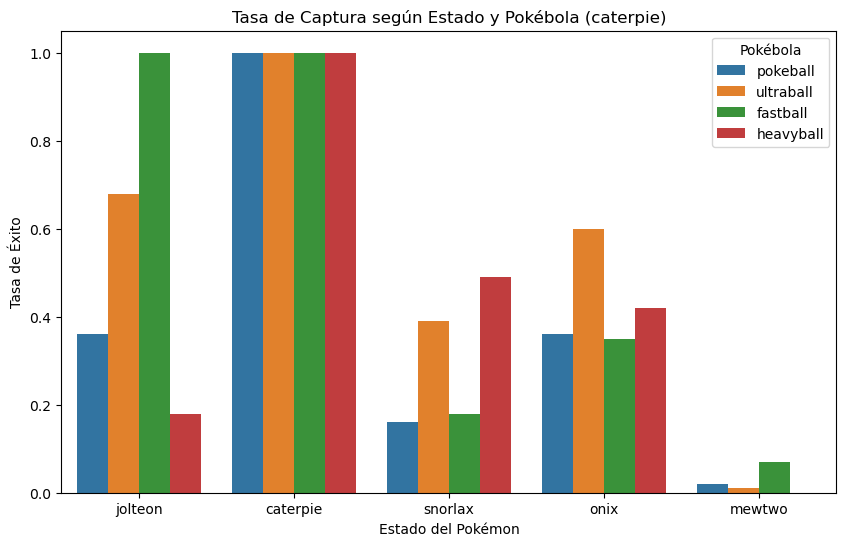

In [32]:

import sys
sys.path.append('C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0')

import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# carga de pókemon

pokemon_file = "C:\\Users\\USUARIO\\OneDrive - Alumnos Facultad de Ingeniería - UNLP\\Doctorado\\Cursos de posgrado\\2025 Parte 1\\Sistemas de Inteligencia Artificial\\TP0\\SIA TP0\\pokemon.json"
with open(pokemon_file,"r") as f:
    datos_pokemon = json.load(f)
     
     
# Pokebolas y pokemones

pokemon = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokebolas = ["pokeball", "ultraball", "fastball", "heavyball"]
NIVEL = 10
HP =0.1
# Generacion

gen_pokemon = PokemonFactory(pokemon_file)



# La idea es generar una función que utilice attemp catch pero para varios pokemones

def atrapar(pokemon,pokebola,intentos,NIVEL,HP,estado):
    resultados = []
    resultados_promediados = []
    
    for bolas in pokebolas:
        exitos = 0
        probabilidad_exito = []
        
        for _ in range(intentos):
            pokes = gen_pokemon.create(pokemon, NIVEL, StatusEffect[estado], HP)
            exitos_tasa, capture = attempt_catch(pokes, bolas)
            
            if exitos_tasa:
                exitos += 1
            probabilidad_exito.append(capture)   
            
        resultados.append([pokemon,bolas,exitos/intentos,np.mean(probabilidad_exito)])   
   
    return resultados

INTENTOS = 100;

resultados = []
for pkmn in pokemon:
    resultados.extend((atrapar(pkmn, pokebolas,INTENTOS,NIVEL,HP,"SLEEP")))
    
pokemon_seleccionado = "caterpie"
df_results = pd.DataFrame(resultados, columns=["Pokemon", "Pokebola", "Tasa exito", "Media de captura"])
print(df_results)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x="Pokemon", y="Tasa exito", hue="Pokebola")
plt.xlabel("Estado del Pokémon")
plt.ylabel("Tasa de Éxito")
plt.title(f"Tasa de Captura según Estado y Pokébola ({pokemon_seleccionado})")
plt.legend(title="Pokébola")
plt.show()





